# Link Prediction on KG-IDG

## Setup

In [2]:
# Yes, this is messy, but GraPE is not part of the rest of this project.
!poetry install
!pip install grape
import grape
from grape import Graph

Installing dependencies from lock file

No dependencies to install or update

Installing the current project: kg-idg (0.0.2)Installing the current project: kg-idg (0.0.2)


/home/harry/kg-idg/.venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load the KG-IDG Graph

In [3]:
# Change graph directory as needed.
path_to_graph_directory = "../data/merged/20230101/"

In [ ]:
# This may not be necessary if the graph is already available.
!wget -P {path_to_graph_directory} https://kg-hub.berkeleybop.io/kg-idg/20230101/KG-IDG.tar.gz

In [4]:
# Verify contents of the nodes and edges.
!head {path_to_graph_directory}merged-kg*.tsv

==> ../data/merged/20230101/merged-kg_edges.tsv <==
id	subject	predicate	object	category	relation	provided_by	coexpression	coexpression_transferred	combined_score	cooccurence	database	database_transferred	description	experiments	experiments_transferred	fusion	has_attribute	has_evidence	homology	knowledge_source	neighborhood	neighborhood_transferred	source	textmining	textmining_transferred	type
urn:uuid:e8b60fee-1d25-4024-affe-3cb9381e8a5a	ENSEMBL:ENSP00000000233	biolink:interacts_with	ENSEMBL:ENSP00000272298		RO:0002434		0	62	490	332	0	0		0	181	0			0	Graph	0	0		0	125	biolink:Association
urn:uuid:d9139863-bd4c-49dc-8a0a-9bd67ba8ad23	ENSEMBL:ENSP00000000233	biolink:interacts_with	ENSEMBL:ENSP00000418915		RO:0002434		0	61	606	0	0	0		0	158	0			0	Graph	0	0		542	0	biolink:Association
urn:uuid:293a6827-0f2b-48fe-97ca-e013d98c7972	ENSEMBL:ENSP00000000233	biolink:interacts_with	ENSEMBL:ENSP00000356737		RO:0002434		0	0	418	0	0	0		0	0	0			0	Graph	0	0		419	0	biolink:Association
urn:uuid:7a5b1336-0

In [6]:
# Check on the available node embedding methods.
grape.get_available_models_for_node_embedding()

,model_name,task_name,library_name,available,requires_node_types,can_use_node_types,requires_edge_types,can_use_edge_types,requires_edge_weights,can_use_edge_weights,requires_positive_edge_weights
0,SocioDim,Node Embedding,Ensmallen,True,False,False,False,False,False,False,False
2,DeepWalk GloVe,Node Embedding,Ensmallen,True,False,True,False,True,False,True,True
3,Degree-based WINE,Node Embedding,Ensmallen,True,False,False,False,False,False,False,False
4,Structured Embedding,Node Embedding,Ensmallen,True,False,False,True,True,False,False,False
6,GLEE,Node Embedding,Ensmallen,True,False,False,False,False,False,False,False
8,Score-based WINE,Node Embedding,Ensmallen,True,False,False,False,False,False,False,False
9,Node2Vec CBOW,Node Embedding,Ensmallen,True,False,True,False,True,False,True,True
11,Second-order LINE,Node Embedding,Ensmallen,True,False,False,False,False,False,False,False
13,Walklets GloVe,Node Embedding,Ensmallen,True,False,True,False,True,False,True,True
14,Walklets CBOW,Node Embedding,Ensmallen,True,False,True,False,True,False,True,True


In [5]:
nodepath = path_to_graph_directory + 'merged-kg_nodes.tsv'
edgepath = path_to_graph_directory + 'merged-kg_edges.tsv'

In [6]:
graph_version = "20230101"
graph_name = f"KG-IDG {graph_version}"
print(graph_name)
g = Graph.from_csv(
      directed=True,
      node_path=nodepath,
      edge_path=edgepath,
      verbose=True,
      nodes_column='id',
      node_list_node_types_column='category',
      default_node_type='biolink:NamedThing',
      sources_column='subject',
      destinations_column='object',
      edge_list_edge_types_column='predicate',
      name=graph_name
    )

KG-IDG 20230101


In [11]:
g

<div class="graph-report"><style>.graph-report li {margin: 0.5em 0 0.5em 0;}.graph-report .paragraph {text-align: justify;word-break: break-all;}.graph-report .small-columns {column-count: 4;column-gap: 2em;}.graph-report .medium-columns {column-count: 3;column-gap: 2em;}.graph-report .large-columns {column-count: 2;column-gap: 2em;}.graph-report .single-column {}@media only screen and (max-width: 600px) {.graph-report .small-columns {column-count: 1;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 600px) and (max-width: 800px) {.graph-report .small-columns {column-count: 2;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 800px) and (max-width: 1024px) {.graph-report .small-columns {column-count: 3;}.graph-report .medium-columns {column-count: 2;}.graph-report .large-columns {column-count: 1;}}</style><h2>KG-IDG 20230101</h2><p class="paragraph">The directed multigraph KG-IDG 20230101 has 560.29K heterogeneous nodes and 4.43M heterogeneous edges. The RAM requirements for the nodes and edges data structures are 65.15MB and 22.21MB respectively.</p><h3 style="margin: 1em 0 0 0;">Degree centrality</h3><p class="paragraph">The minimum node degree is 0, the maximum node degree is 6.00K, the mode degree is 1, the mean degree is 7.91 and the node degree median is 1.</p><p class="paragraph">The nodes with the highest degree centrality are <a href='https://www.ebi.ac.uk/chebi/searchId.do?chebiId=CHEBI:30616' target='_blank' title='Go to CHEBI to get more informations about CHEBI:30616'>CHEBI:30616</a> (degree 6.00K and node type <a href='https://biolink.github.io/biolink-model/docs/ChemicalSubstance|biolinkChemicalEntity.html' target='_blank' title='Go to BioLink to get more informations about biolink:ChemicalSubstance|biolink:ChemicalEntity'>biolink:ChemicalSubstance|biolink:ChemicalEntity</a>), <a href='https://www.ebi.ac.uk/chebi/searchId.do?chebiId=CHEBI:456216' target='_blank' title='Go to CHEBI to get more informations about CHEBI:456216'>CHEBI:456216</a> (degree 5.43K and node type <a href='https://biolink.github.io/biolink-model/docs/ChemicalSubstance|biolinkChemicalEntity.html' target='_blank' title='Go to BioLink to get more informations about biolink:ChemicalSubstance|biolink:ChemicalEntity'>biolink:ChemicalSubstance|biolink:ChemicalEntity</a>), <a href='https://www.ebi.ac.uk/chebi/searchId.do?chebiId=CHEBI:15377' target='_blank' title='Go to CHEBI to get more informations about CHEBI:15377'>CHEBI:15377</a> (degree 4.48K and node type <a href='https://biolink.github.io/biolink-model/docs/ChemicalSubstance|biolinkChemicalEntity.html' target='_blank' title='Go to BioLink to get more informations about biolink:ChemicalSubstance|biolink:ChemicalEntity'>biolink:ChemicalSubstance|biolink:ChemicalEntity</a>), <a href='https://www.ensembl.org/Gene/Summary?g=ENSP00000229239' target='_blank' title='Go to ENSEMBL to get more informations about ENSEMBL:ENSP00000229239'>ENSEMBL:ENSP00000229239</a> (degree 2.79K and node type <a href='https://biolink.github.io/biolink-model/docs/Protein|biolinkNamedThing.html' target='_blank' title='Go to BioLink to get more informations about biolink:Protein|biolink:NamedThing'>biolink:Protein|biolink:NamedThing</a>) and <a href='https://www.ensembl.org/Gene/Summary?g=ENSP00000451828' target='_blank' title='Go to ENSEMBL to get more informations about ENSEMBL:ENSP00000451828'>ENSEMBL:ENSP00000451828</a> (degree 2.78K and node type <a href='https://biolink.github.io/biolink-model/docs/Protein|biolinkNamedThing.html' target='_blank' title='Go to BioLink to get more informations about biolink:Protein|biolink:NamedThing'>biolink:Protein|biolink:NamedThing</a>).</p><h3 style="margin: 1em 0 0 0;">Node types</h3><p class="paragraph">The graph has 39 node types, of which the 10 most common are <a href='https://biolink.github.io/biolink-model/docs/Ch

## Build and Evaluate Node Embeddings

In [9]:
from grape.embedders import FirstOrderLINEEnsmallen
from grape import GraphVisualizer
import pandas as pd

/home/harry/kg-idg/.venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:841: FutureWarning: The parameter `square_distances` has not effect and will be removed in version 1.3.
  warnings.warn(
/home/harry/kg-idg/.venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:841: FutureWarning: The parameter `square_distances` has not effect and will be removed in version 1.3.
  warnings.warn(


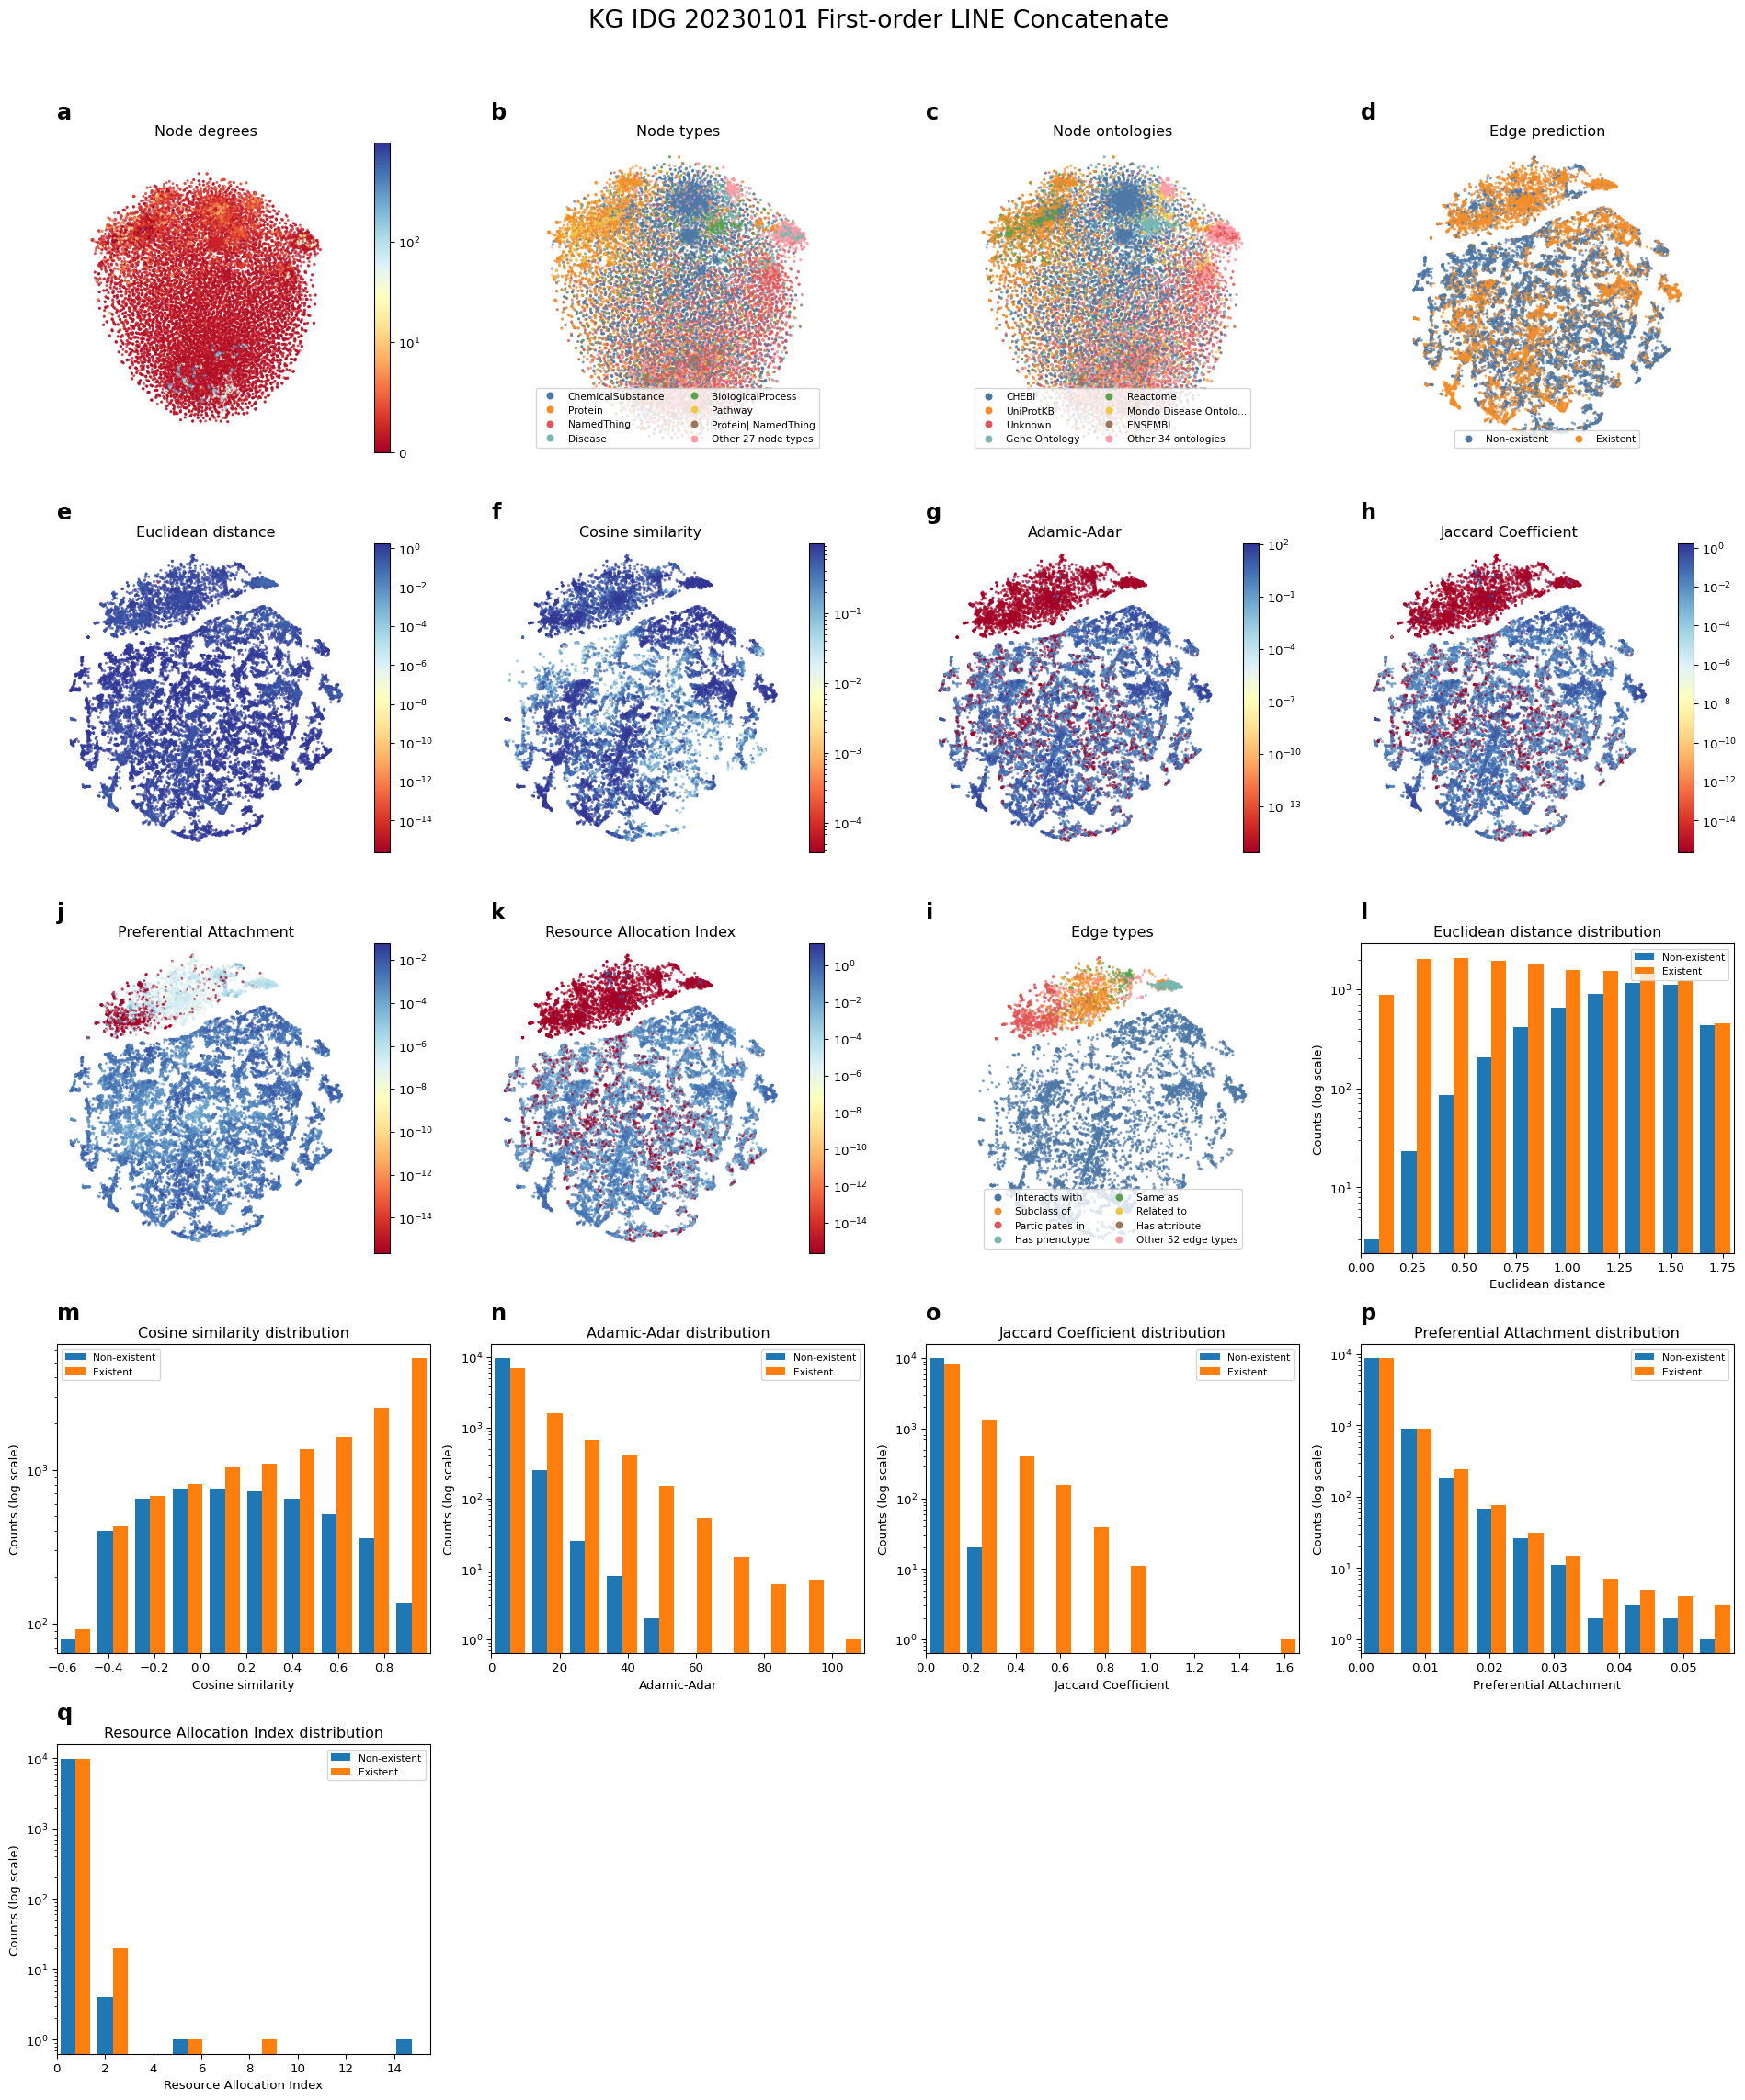

In [8]:
# First-Order LINE won't produce terribly useful embeddings for KG-IDG with default parameters,
# but it's fast. Second-Order LINE seems to get better separation between edges but worse 
# representation of nodes.

embed_type = "FirstOrderLINEEnsmallen"
model = FirstOrderLINEEnsmallen()
    
g = g.remove_disconnected_nodes()

embedding = model.fit_transform(g)

visualizer = GraphVisualizer(g)

embedding_outfilename = g.get_name() + f"_{embed_type}_embed.csv"

visualizer.fit_and_plot_all(embedding)

raw_embedding = embedding.get_node_embedding_from_index(0)

# You don't *really* need to save the raw embedding
# but it may be convenient for reproducibility
raw_embedding.to_csv(embedding_outfilename, header=False)

## Edge Prediction

In [10]:
from grape.edge_prediction import PerceptronEdgePrediction

In [28]:
grape.get_available_models_for_edge_prediction()

,model_name,task_name,library_name,available,requires_node_types,can_use_node_types,requires_edge_types,can_use_edge_types,requires_edge_weights,can_use_edge_weights,requires_positive_edge_weights
84,Extra Trees Classifier,Edge Prediction,scikit-learn,True,False,False,False,False,False,False,False
85,Random Forest Classifier,Edge Prediction,scikit-learn,True,False,False,False,False,False,False,False
86,MLP Classifier,Edge Prediction,scikit-learn,True,False,False,False,False,False,False,False
87,Decision Tree Classifier,Edge Prediction,scikit-learn,True,False,False,False,False,False,False,False
88,Gradient Boosting Classifier,Edge Prediction,scikit-learn,True,False,False,False,False,False,False,False
92,Perceptron,Edge Prediction,Ensmallen,True,False,False,False,False,False,False,False


In [11]:
# Set up the usual train and test sets.
# Then re-build the node embedding model as above, since it's on a new set.
train, test = g.connected_holdout(train_size=0.8)
embeddings = model.fit_transform(train)

In [12]:
# Now build and fit the edge prediction model.
# This will be one of the slower steps.
model = PerceptronEdgePrediction(
    edge_features=None,
    number_of_edges_per_mini_batch=128,
    edge_embeddings="Maximum"
)
model.fit(
    graph=train, 
    node_features=embeddings
)

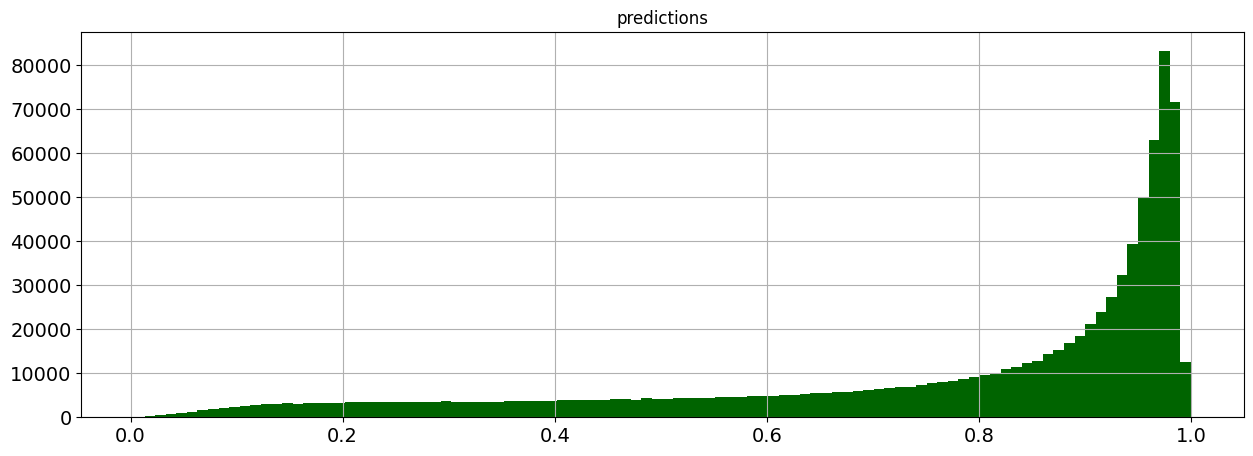

In [13]:
# Test for edge existence prediction.
test_edge_pred = model.predict_proba(
    graph=test,
    node_features=embeddings,
    return_predictions_dataframe=True
)
hist = test_edge_pred.hist(bins=100,
                           color="darkgreen",
                           column="predictions", 
                           figsize = (15,5),
                           xlabelsize = 14,
                           ylabelsize = 14,
                          )

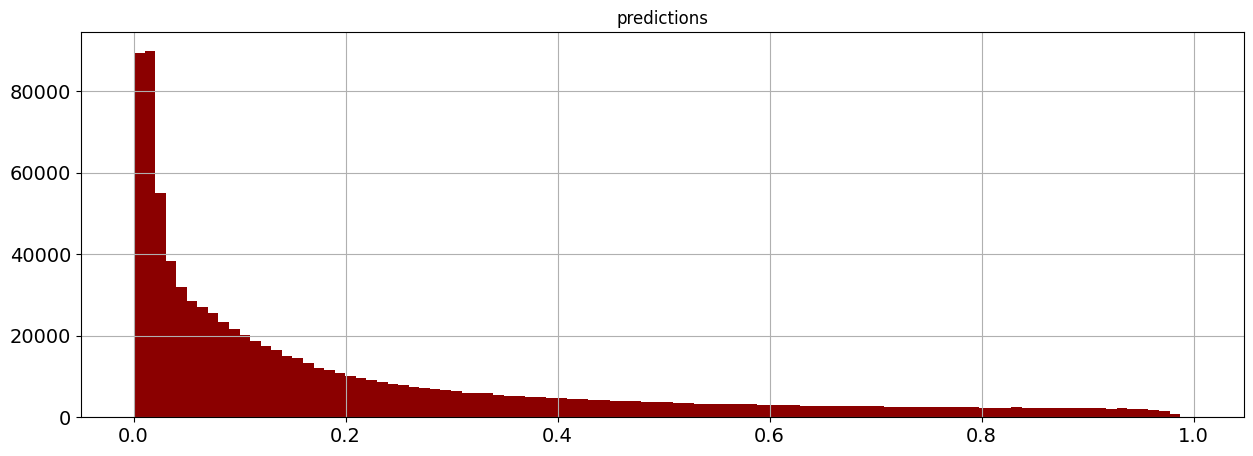

In [14]:
# Test for edge non-existence prediction
test_neg_edge_pred = model.predict_proba(
    graph=g.sample_negative_graph(number_of_negative_samples=test.get_number_of_edges()),
    node_features=embeddings,
    return_predictions_dataframe=True
)
hist = test_neg_edge_pred.hist(bins=100,
                           color="darkred",
                           column="predictions", 
                           figsize = (15,5),
                           xlabelsize = 14,
                           ylabelsize = 14,
                          )

In [15]:
# Now for some predictions.
# Twice as many non-existing edges as there are existing edges.
# The name remapping requires some extra time.
preds = model.predict_proba(
    graph=g.sample_negative_graph(number_of_negative_samples=2 * (g.get_number_of_edges())),
    node_features=embeddings,
    return_predictions_dataframe=True,
    return_node_names=True
)

cols = ["sources", "destinations"]

# Remove all existing edges
# Note this is directed, so A -> B != B -> A 
all_edge_node_names = g.get_edge_node_names(directed=True)
preds = preds[~preds[cols].apply(tuple, 1).isin(all_edge_node_names)]

# Remove self-edges.
preds = preds[preds[cols[0]] != preds[cols[1]]]

# Sort
preds.sort_values(by=['predictions'], ascending=False, inplace=True)
preds

,predictions,sources,destinations
831728,0.998410,UniProtKB:P62273,UniProtKB:P05386
6607343,0.997648,UniProtKB:Q7KMQ0,UniProtKB:P0CG69
4363728,0.996987,UniProtKB:Q9V831,UniProtKB:Q9W1S5
3265610,0.996817,UniProtKB:P18101,UniProtKB:Q7KMP8
8860562,0.996599,UniProtKB:Q9V3V6,UniProtKB:Q9V831
...,...,...,...
5753743,0.000383,ENSEMBL:ENSP00000280362,CHEBI:70827
1401672,0.000364,ENSEMBL:ENSP00000356919,UniProtKB:E2RCX0
1094463,0.000328,UniProtKB:Q91WA1,ENSEMBL:ENSP00000229239
4235995,0.000312,HP:0005063,ENSEMBL:ENSP00000420270


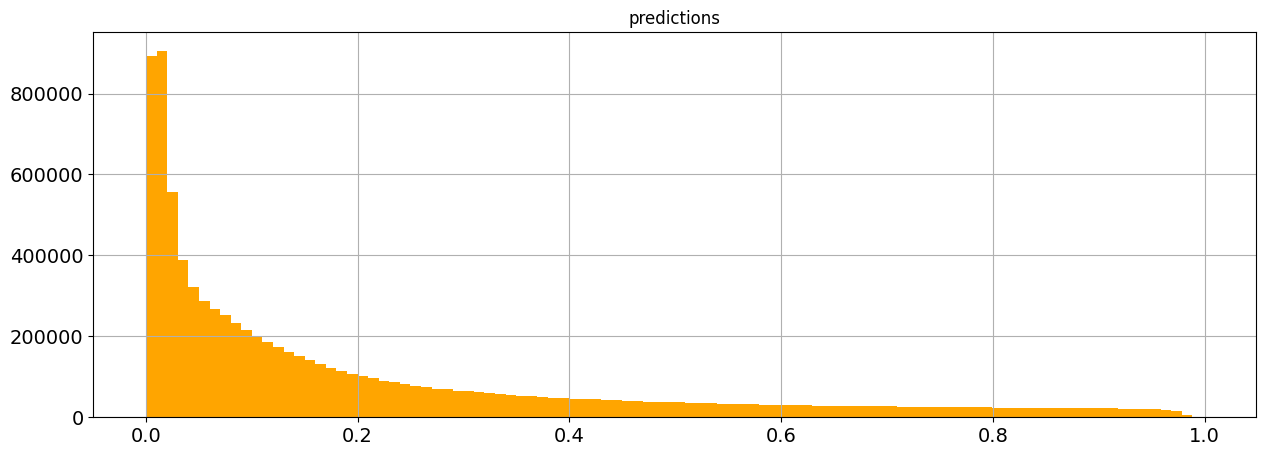

In [16]:
# This will look much like the negative graph, since it is one
hist = preds.hist(bins=100,
                   color="orange",
                   column="predictions", 
                   figsize = (15,5),
                   xlabelsize = 14,
                   ylabelsize = 14,
                  )

In [24]:
# We can predict based on subgraphs, but first let's just filter the results.
top_preds = preds[preds["predictions"] > 0.95]
top_preds[['source_prefix','source_id']] = top_preds["sources"].str.split(":", expand = True)
top_preds[['destination_prefix','destination_id']] = top_preds["destinations"].str.split(":", expand = True)
top_diff_preds = top_preds[top_preds['source_prefix'] != top_preds['destination_prefix']]
top_diff_preds

/tmp/ipykernel_27087/1498946297.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_preds[['source_prefix','source_id']] = top_preds["sources"].str.split(":", expand = True)
/tmp/ipykernel_27087/1498946297.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_preds[['source_prefix','source_id']] = top_preds["sources"].str.split(":", expand = True)
/tmp/ipykernel_27087/1498946297.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

,predictions,sources,destinations,source_prefix,source_id,destination_prefix,destination_id
7451927,0.993803,MONDO:0007186,PMID:21818695,MONDO,0007186,PMID,21818695
1845929,0.993305,DrugCentral:180,PMID:24306326,DrugCentral,180,PMID,24306326
1863698,0.993184,PMID:15546675,DrugCentral:2132,PMID,15546675,DrugCentral,2132
7404497,0.993180,UniProtKB:P50406,PMID:21818695,UniProtKB,P50406,PMID,21818695
790738,0.993049,DrugCentral:2770,PMID:15546675,DrugCentral,2770,PMID,15546675
...,...,...,...,...,...,...,...
8561426,0.950070,CHEBI:85994,UniProtKB:P62877,CHEBI,85994,UniProtKB,P62877
5381452,0.950062,Orphanet:791,CHEBI:87634,Orphanet,791,CHEBI,87634
4100351,0.950046,UniProtKB:Q14643,CHEBI:29985,UniProtKB,Q14643,CHEBI,29985
6561647,0.950042,UniProtKB:A0A6I8SVI1,CHEBI:36916,UniProtKB,A0A6I8SVI1,CHEBI,36916


Here are the top hits (as of a run on Mar 8 2023):

1. MONDO:0007186 vs. PMID:21818695 - "gastroesophageal reflux disease" vs a 2011 paper about the Biopharmaceutics Drug Disposition Classification System. Not a clear positive or negative.

2. DrugCentral:180 vs. PMID:24306326 - amitriptyline vs a 2014 paper titled "Critical evaluation of human oral bioavailability for pharmaceutical drugs by using various cheminformatics approaches"

3. PMID:15546675 vs. DrugCentral:2132 - A 2004 paper titled "Estimating the safe starting dose in phase I clinical trials and no observed effect level based on QSAR modeling of the human maximum recommended daily dose" vs pheniramine

4. UniProtKB:P50406 vs. PMID:21818695 - 5-hydroxytryptamine receptor 6 vs that Biopharmaceutics Drug Disposition Classification System paper again. This paper may simply be a common reference for DrugCentral entries, though this protein is a serotonin receptor and therefore interesting in the context of drug classification (not sure _how_, though).

5. DrugCentral:2770 vs. PMID:15546675 - trolnitrate vs the "Estimating the safe starting dose in phase I clinical trials..." paper. Relevance unclear.

So the top hits may not be informative. Let's filter for drug and protein hits.

In [26]:
top_drug_prot_preds = top_diff_preds.loc[(top_diff_preds['source_prefix'] == 'UniProtKB') & (top_diff_preds['destination_prefix'] == 'DrugCentral')]
top_drug_prot_preds

,predictions,sources,destinations,source_prefix,source_id,destination_prefix,destination_id
4046833,0.988420,UniProtKB:Q9H3N8,DrugCentral:671,UniProtKB,Q9H3N8,DrugCentral,671
2968625,0.986048,UniProtKB:P41240,DrugCentral:4187,UniProtKB,P41240,DrugCentral,4187
5170342,0.983973,UniProtKB:P49674,DrugCentral:5347,UniProtKB,P49674,DrugCentral,5347
1847895,0.981113,UniProtKB:Q9Y2I1,DrugCentral:671,UniProtKB,Q9Y2I1,DrugCentral,671
5171641,0.979728,UniProtKB:P08581,DrugCentral:4190,UniProtKB,P08581,DrugCentral,4190
8537880,0.979352,UniProtKB:P37231,DrugCentral:2415,UniProtKB,P37231,DrugCentral,2415
1845230,0.979153,UniProtKB:P05177,DrugCentral:3188,UniProtKB,P05177,DrugCentral,3188
7404504,0.976286,UniProtKB:P28564,DrugCentral:2656,UniProtKB,P28564,DrugCentral,2656
7405744,0.974638,UniProtKB:O14649,DrugCentral:1212,UniProtKB,O14649,DrugCentral,1212
4098139,0.972321,UniProtKB:Q9BXC9,DrugCentral:4072,UniProtKB,Q9BXC9,DrugCentral,4072


The first hit here (Q9H3N8) is a histamine H4 receptor vs. clemastine, a histamine H1 antagonist. Not too bad, but is it helpful to know? Perhaps not, since clemastine is selective for H1.

The second hit is the non-receptor tyrosine-protein kinase CSK (P41240) vs crizotinib, a tyrosine kinase inhibitor. Makes sense. It doesn't appear to be a well-studied interaction, though. A 2013 review (PMID:24455567) discusses crizotinib as a treatment for non-small-cell lung cancers with anaplastic lymphoma kinase gene rearrangements. This protein is also known as C-Src kinase, and C-Src is a known proto-oncogene associated with non-small cell lung cancer in particular (https://doi.org/10.1016/S0959-8049(03)00276-4)